In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
#Read the track metadata with Genres label
tracks = pd.read_csv(r"C:\Users\yy\Downloads\fma-rock-vs-hiphop.csv")

#Read the track metrices data with features
echonest = pd.read_json(r"C:\Users\yy\Downloads\echonest-metrics.json")

In [11]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [10]:
echonest.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [19]:
#Merge the track_id and genre_top columns of tracks and echonest_metrics on track_id values
echo_tracks = pd.merge(echonest, tracks[["track_id", "genre_top"]],  on="track_id")
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [22]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [25]:
#Create corelation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


NORMALIZING THE FEATURES DATA

In [41]:
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1)
labels = echo_tracks['genre_top']
scaler = StandardScaler()
scaler_features =scaler.fit_transform(features)
pd.DataFrame(scaler_features).head()

,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102


PRINCIPAL COMPONENT ANALYSIS ON SCALED DATA

In [48]:
pca = PCA()
pca.fit(scaler_features)
exp_variance = pca.explained_variance_ratio_

In [49]:
print("Explained variance ratio : \n{}".format(pca.explained_variance_ratio_))
print("\n")
print("Number of components = {}".format(pca.n_components_))

Explained variance ratio : 
[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]


Number of components = 8


Text(0.5, 0, 'Principal Component #')

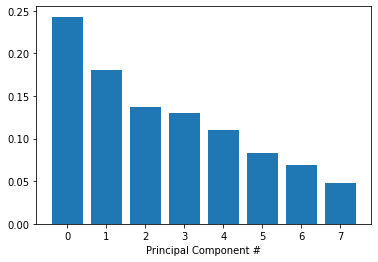

In [57]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Principal Component #')

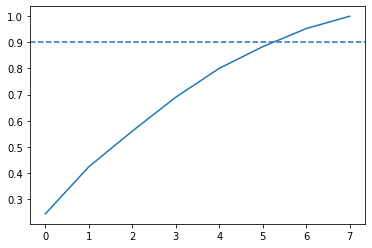

In [72]:
cum_exp_variance = np.cumsum(exp_variance) #calculate the cumulative explained variance

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.90, linestyle='--') #for considering features needed to explain 90% of the variance

In [74]:
n_components = 6

In [90]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaler_features)
pca_projection = pca.transform(scaler_features)
pca_projection.shape

(4802, 6)

In [97]:
#Import train_test_split function 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, random_state=10)

In [98]:
#Import Decision tree classifier and train our decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [104]:
#Predict the labels for the test data
pred_tree = tree.predict(X_test)
print("Decision Tree Classifier:", tree.score(X_test, y_test))

Decision Tree Classifier: 0.8434637801831807


In [111]:
#Import Logistic Regression N train our Logistic regressio model
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression(random_state=10)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [113]:
#Predict the labels for the test data
pred_log =log_reg.predict(X_test)
print("Logistic Regression:", log_reg.score(X_test, y_test))

Logistic Regression: 0.8784346378018318


In [132]:
#Create the classification report for both models
from sklearn.metrics import classification_report
tree_rep = classification_report(y_test, pred_tree)
print("Decision Tree Classifier:\n", tree_rep)
log_rep = classification_report(y_test, pred_log)
print("Logistic Regression:\n", log_rep)

Decision Tree Classifier:
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression:
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



C:\Users\yy\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre_top', ylabel='count'>

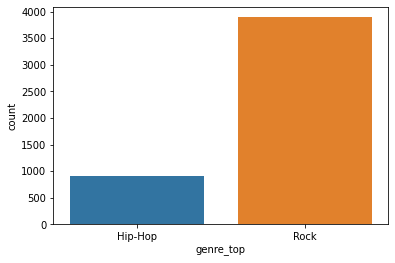

In [135]:
sns.countplot(echo_tracks["genre_top"], label="Count")

In [137]:
# Subset only the hip-hop tracks, and then only the rock tracks
hip_hop = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

In [141]:
hip_hop.shape

(910, 10)

In [142]:
rock.shape

(3892, 10)

In [144]:
rock = rock.sample(hip_hop.shape[0], random_state=10)

In [153]:
#concatenate to create the balanced dataset
balanced_data = pd.concat([rock, hip_hop])
balanced_data

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
773,4038,0.825838,0.263645,0.797948,8.423181e-01,0.177089,0.045277,166.580,0.713586,Rock
2273,19501,0.966635,0.386114,0.651980,8.694723e-01,0.353138,0.032208,130.767,0.712374,Rock
2846,31252,0.721510,0.358035,0.948187,8.011837e-01,0.105706,0.095522,125.884,0.208728,Rock
2147,17947,0.617370,0.487321,0.918848,8.170503e-01,0.089908,0.040337,129.565,0.268893,Rock
2654,27421,0.025464,0.245523,0.422381,9.380106e-01,0.441009,0.038795,149.960,0.439876,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [155]:
#features and labels for the new balanced data
features = balanced_data.drop(['genre_top', 'track_id'], axis=1) 
labels = balanced_data['genre_top']

In [159]:
pca.projection = pca.fit_transform(scaler.fit_transform(features))
pca.projection.shape

(1820, 6)

In [164]:
#split this balanced data into test and train
X_train, X_test, y_train, y_test =train_test_split(pca.projection, labels, random_state=10)

In [170]:
#Train and predict decision tree on balanced data
tree1= DecisionTreeClassifier(random_state=10)
tree1.fit(X_train, y_train)
pred_tree1=tree1.predict(X_test)

In [177]:
#train and predict logistic regression on balanced data
log_reg1 = LogisticRegression(random_state=10)
log_reg1.fit(X_train, y_train)
pred_log1= log_reg1.predict(X_test)

# COMPARE THE MODELS

In [181]:
print("Decision Tree:\n", classification_report(y_test, pred_tree1))

Decision Tree:
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455



In [180]:
print("Logistic Regression:\n", classification_report(y_test,pred_log1))

Logistic Regression:
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



In [229]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

tree1 = DecisionTreeClassifier(random_state=10)
log_reg1= LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree1, pca.projection,labels,  cv=cv, scoring = 'accuracy', n_jobs=-1)
logit_score = cross_val_score(log_reg1, pca.projection,labels, cv=cv,scoring = 'accuracy', n_jobs=-1 )


In [231]:
print("Decision Tree Accuracy:", np.mean(tree_score))

Decision Tree Accuracy: 0.7780219780219779


In [230]:
print("Logistic Regression Accuracy:", np.mean(logit_score))

Logistic Regression Accuracy: 0.8219780219780219


In [239]:
from sklearn import metrics